> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate TMDb movie data



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 
1. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. 
2. There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is. 
3. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
> <div class="alert alert-block alert-success"> The dataset contains data for <b>10866:</b>movies. There are total 21 columns with few of the interesting fields like revenue, budget, genres etc. which I will be using today for the analysis. <br/>

    
> <div class="alert alert-block alert-success">
    As mentioned in the rubrics 'The project clearly states one or more questions, then addresses those questions in the rest of the analysis.', I will attempt following questions from the dataset.<br/>
    (a)  <b>How have movie genres changed over time? </b><br/> I am planning to use variables such as: Genres (Primary), Total No. of movies, Release year, Budget, Revenue, Profit (Revenue – Budget) <br/>
    (b)  <b>Assuming I am planning to launch my production house, which movie I should create ?</b> To provide the recommendation I will try to answer the follow up questions:<br/>
        1)  Most profitable genre<br/>
        2)  Most popular genre<br/>
    I will get some insight from the first question<br/>
        3)  Highest budget movies<br/>
        4)  Most Profitable movies<br/>
     (c)  <b>How have movies based on novels performed relative to movies not based on novels?</b>
    <br/></div>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv as csv


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#Load the data
df = pd.read_csv('tmdb-movies.csv')
# print first 5 and last 5 records, one at a time
df.head(1)
df.tail(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [3]:
# describe the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 
> <div class="alert alert-block alert-success">
    Following data cleasing activities will be performed in upcoming cells<br/>
    (a)  <b>Remove duplicates </b><br/>
    (b)  <b>Remove extra columns. Column required for analysis are - id, popularity, budget, revenue, runtime, genres, production companies, keywords, tagline </b><br/>
    (c)  <b>Remove records with budget and revenue as 0 as those are required to calculate the profitability </b><br/>
    (d)  <b>Find and handle NULL values, either drop or replace with 0 </b><br/>
    (e)  <b>Split the column values by '|' and take the first value from genres and production companies </b><br/>
    (f)  <b>Validate the datatype for each field and update if required </b><br/>
    <br/></div>

In [4]:
# Find duplicate values in the data set, only 1 duplicate record found
sum(df.duplicated())


1

In [5]:
# remove the duplicate record and run the same command again to see if there are no more duplicates
df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

In [6]:
# Validate the record count, one record dropped
df.shape

(10865, 21)

In [7]:

#remove extra columns
df.drop(['imdb_id','original_title','cast','homepage','director','overview','release_date','vote_count','vote_average','budget_adj','revenue_adj'],axis =1,inplace = True)

In [8]:
df.head()

,id,popularity,budget,revenue,tagline,keywords,runtime,genres,production_companies,release_year
0,135397,32.985763,150000000,1513528810,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015
1,76341,28.419936,150000000,378436354,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015
2,262500,13.112507,110000000,295238201,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015
3,140607,11.173104,200000000,2068178225,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015
4,168259,9.335014,190000000,1506249360,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015


In [9]:
print('Records before dropping NULL',df.shape)
df.isnull().sum()

#drop the records with NULL values
df.dropna(axis=0, inplace=True)
print('Records after dropping NULL',df.shape)

Records before dropping NULL (10865, 10)
Records after dropping NULL (7046, 10)


In [10]:
# Movie data with 0 value populated for runtime, budget and revenue seems unrealistic and hence can be dropped for better analysis
# replace the 0 values with NAN
# I have create three copies for each question and will remove the null values based on tha analysis
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

print('df1 = ',df1.shape)
print('df2 = ',df2.shape)
print('df3 = ',df3.shape)

df1['runtime'].replace(0, np.NaN, inplace=True)
df1['revenue'].replace(0, np.NaN, inplace=True)
df1['budget'].replace(0, np.NaN, inplace=True)

# For question # 1: Remove the records with no value in the budget, revenue and runtime as those are important parameter.
df1.dropna(subset=['budget','revenue','runtime'], inplace=True)

print('df1 = ',df1.shape)
print('df2 = ',df2.shape)
print('df3 = ',df3.shape)

df.isnull().sum()

df1 =  (7046, 10)
df2 =  (7046, 10)
df3 =  (7046, 10)
df1 =  (3446, 10)
df2 =  (7046, 10)
df3 =  (7046, 10)


id                      0
popularity              0
budget                  0
revenue                 0
tagline                 0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_year            0
dtype: int64

> <div class="alert alert-block alert-success"> The data in genre, keywords and prodution companies is contactinated with pipe '|' operator. I will pick the first letter from genre and production compaies and will need to search for keyword.<br/>
To perform this task I will create a function to split the columns <br/>

</div>



In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Function split
def split(column):
    return column.str[0:].str.split('|', expand = True)
genres = split(df1['genres'])
production_companies = split(df1['production_companies'])
keywords = split(df1['keywords'])

df1["genres"] = genres[0]
df1["production_companies"] = production_companies[0]




In [12]:
df1.dtypes

id                        int64
popularity              float64
budget                  float64
revenue                 float64
tagline                  object
keywords                 object
runtime                 float64
genres                   object
production_companies     object
release_year              int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### <b>Question # 1:   How have movie genres changed over time? </b><br/> I am planning to use variables such as: Genres (Primary), Total No. of movies, Release year, Budget, Revenue, Profit (Revenue – Budget) <br/>

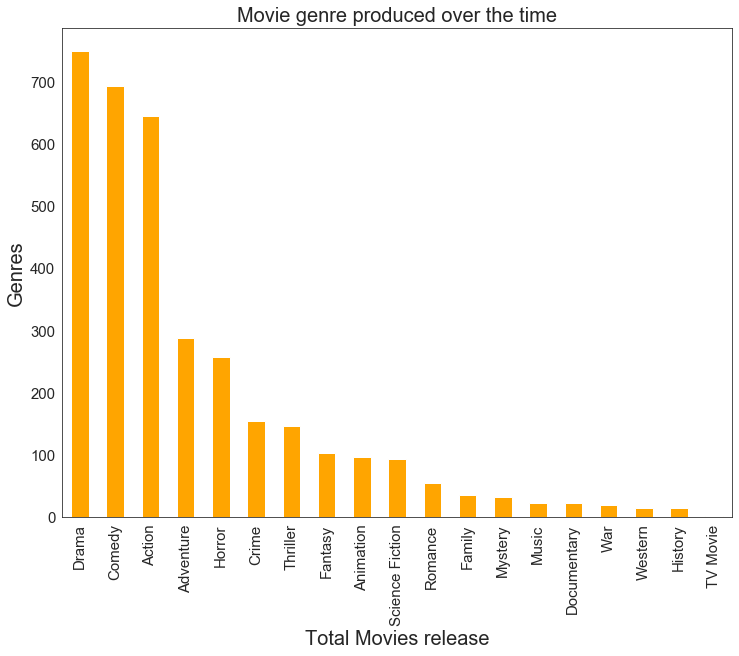

Drama              750
Comedy             694
Action             646
Adventure          288
Horror             258
Crime              154
Thriller           146
Fantasy            103
Animation           97
Science Fiction     94
Romance             55
Family              36
Mystery             33
Music               22
Documentary         22
War                 19
Western             14
History             14
TV Movie             1
Name: genres, dtype: int64

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

movies = df1.groupby('genres').count()['id']

sns.set_style("white")
movies.sort_values(ascending = False).plot(kind= 'bar',figsize = (12,9),fontsize=15,color = 'orange',)
plt.xlabel('Total Movies release' , fontsize = 20)
plt.ylabel('Genres' , fontsize = 20)
plt.title('Movie genre produced over the time',fontsize = 20)
plt.show()

df1['genres'].value_counts()






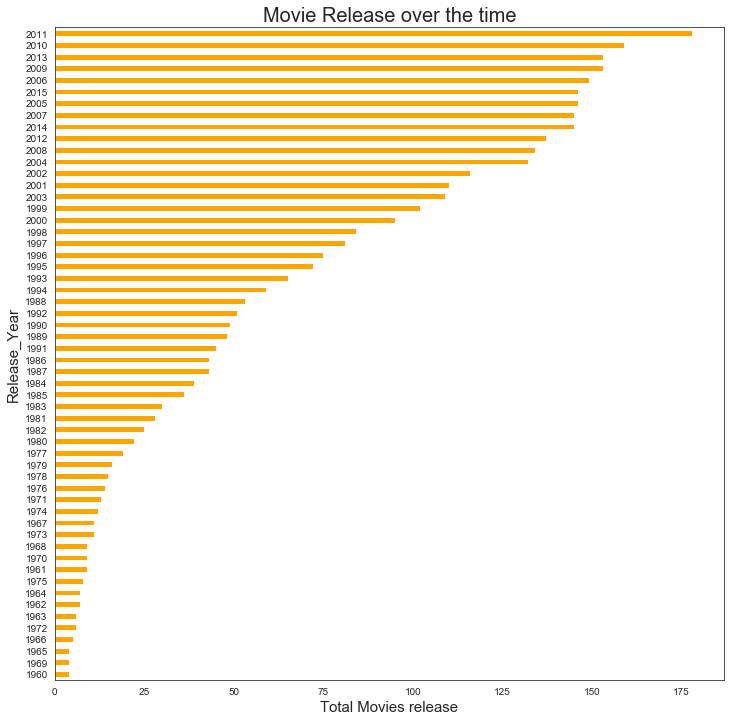

In [14]:

movies = df1.groupby('release_year').count()['id']

sns.set_style("white")
movies.sort_values(ascending = True).plot(kind= 'barh',figsize = (12,12),fontsize=10,color = 'orange',)
plt.xlabel('Total Movies release' , fontsize = 15)
plt.ylabel('Release_Year' , fontsize = 15)
plt.title('Movie Release over the time',fontsize = 20)
plt.show()



In [15]:
# analyze the top most genre for last 15 years
movies1 = df1.groupby('release_year')['genres'].value_counts().reset_index(name = 'counts')
movies1.set_index('genres',inplace =True)
movies1[movies1["release_year"].between(2000,2015)].groupby(['release_year'])['counts'].idxmax()
#movies1[movies1["release_year"].between(2010,2020)]



release_year
2000    Comedy
2001    Action
2002     Drama
2003     Drama
2004    Comedy
2005     Drama
2006     Drama
2007    Comedy
2008    Comedy
2009    Comedy
2010     Drama
2011     Drama
2012     Drama
2013     Drama
2014     Drama
2015     Drama
Name: counts, dtype: object

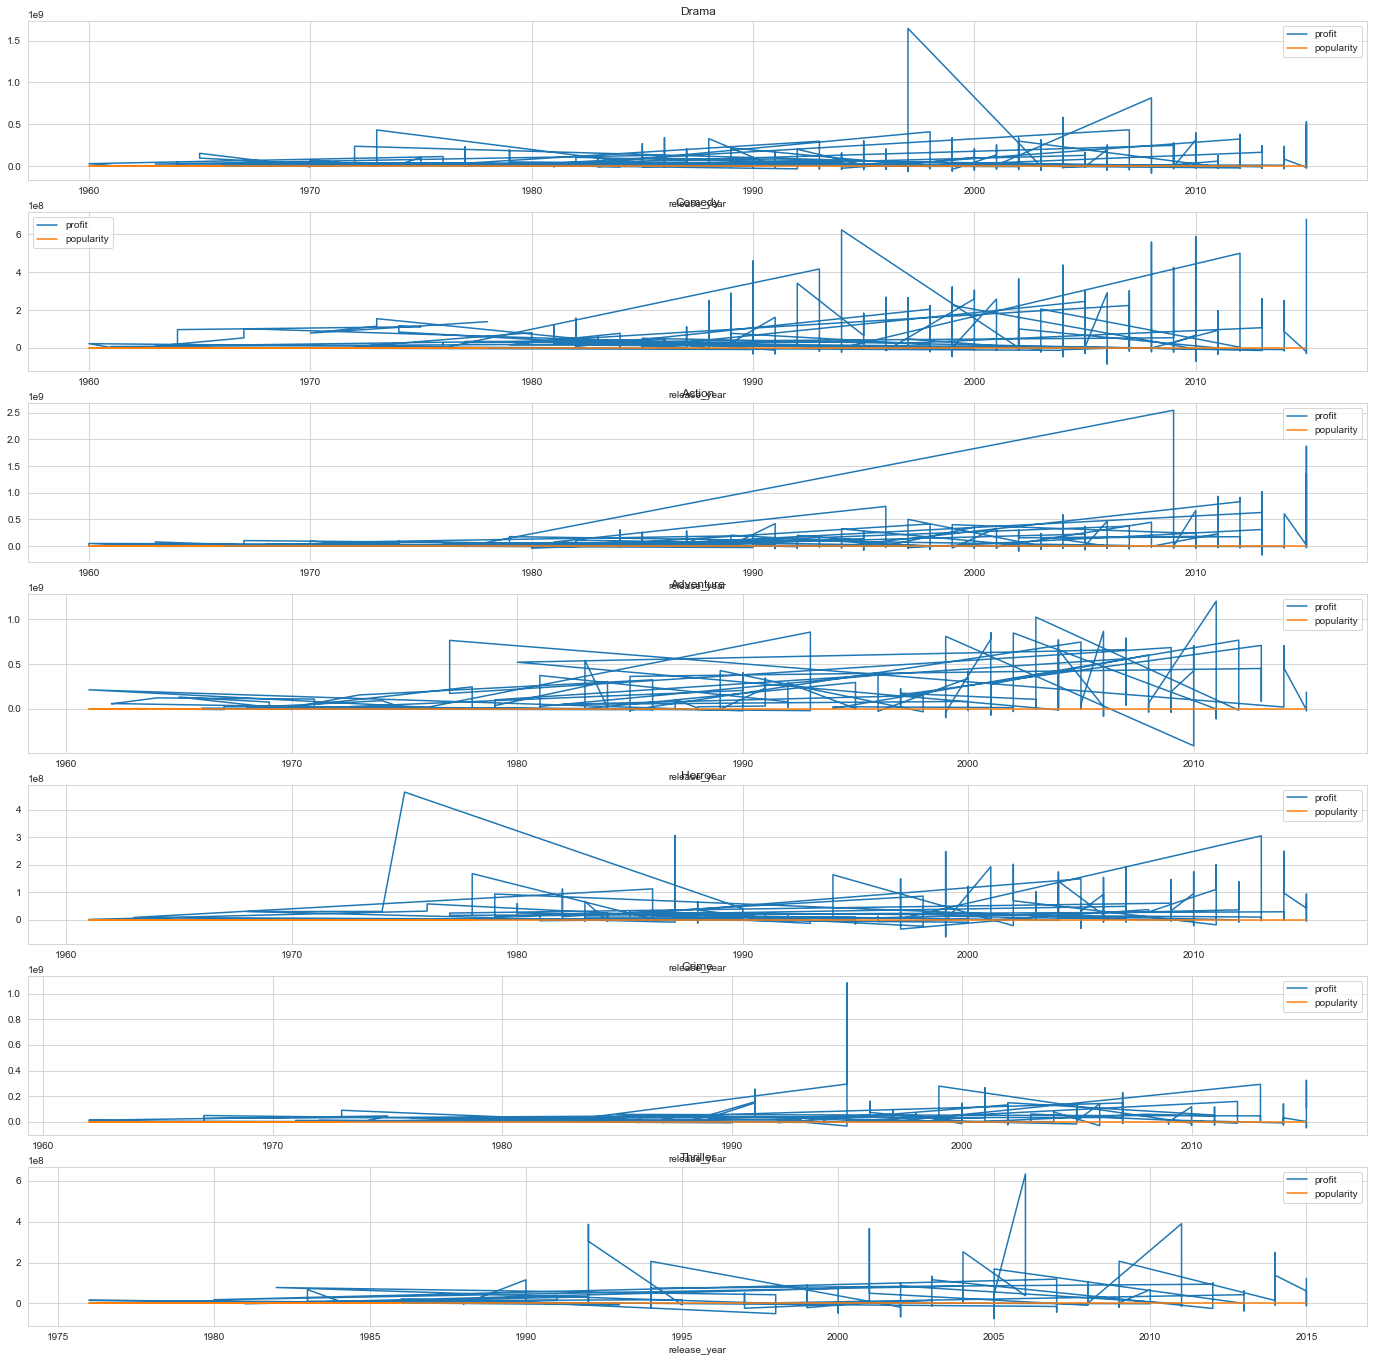

In [16]:
df1['profit'] = df1['revenue'].sub(df1['budget'],axis = 'index')
df1.head()
profit = df1.groupby('genres').sum()
profit.head(10)

sns.set_style("whitegrid")
fig, ax = plt.subplots(7,figsize = (24,24))

# Create line graph to analyse two variables for top 6 genres
df1[df1["genres"] == 'Drama'].plot(x='release_year', y=['profit', 'popularity'],title="Drama",ax = ax[0],legend=True )#.get_figure()
df1[df1["genres"] == 'Comedy'].plot(x='release_year', y=['profit', 'popularity'],title="Comedy",ax = ax[1],legend=True)#.get_figure()
df1[df1["genres"] == 'Action'].plot(x='release_year', y=['profit', 'popularity'],title="Action",ax = ax[2],legend=True)#.get_figure()
df1[df1["genres"] == 'Adventure'].plot(x='release_year', y=['profit', 'popularity'],title="Adventure",ax = ax[3],legend=True)#.get_figure()
df1[df1["genres"] == 'Horror'].plot(x='release_year', y=['profit', 'popularity'],title="Horror",ax = ax[4],legend=True)#.get_figure()
df1[df1["genres"] == 'Crime'].plot(x='release_year', y=['profit', 'popularity'],title="Crime",ax = ax[5],legend=True)#.get_figure()
df1[df1["genres"] == 'Thriller'].plot(x='release_year', y=['profit', 'popularity'],title="Thriller",ax = ax[6],legend=True)#.get_figure()









<a id='conclusions'></a>
## Conclusions

>  <div class="alert alert-block alert-info"><br/>
    1. Drama, Comedy and Action movies are produced most in the last 55 years, the production increased substantially from 80s.

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### Research Question 2  (Replace this header name!)

In [17]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!